In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
file = open('LR/7.txt')
line = [line.strip() for line in file]
file.close()

In [32]:
num_of_features = int(line[0])
num_of_train = int(line[1])
num_of_test = int(line[num_of_train + 2])

In [33]:
data_train = pd.read_table('LR/7.txt', sep='\s+', skiprows = 2, header=None, nrows = num_of_train)
data_test = pd.read_table('LR/7.txt', sep='\s+', skiprows = 3 + num_of_train, header=None)

In [34]:
X_test = data_test.iloc[:,:-1].values
X_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1:].values
y_test = data_test.iloc[:,-1:].values

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [36]:
alpha = 100
NRMSE_train = np.array([])
NRMSE_test = np.array([])

In [37]:
for i in range(1, alpha):
    clf = Ridge(alpha=i)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    NRMSE_train = np.append(np.sqrt(mean_squared_error(y_train, y_train_pred))/abs(np.mean(y_train)), NRMSE_train)
    NRMSE_test = np.append(np.sqrt(mean_squared_error(y_test, y_test_pred))/abs(np.mean(y_test)), NRMSE_test)
#print(NRMSE_train, NRMSE_test)

C:\Users\yadro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78298e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\yadro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.02195e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\yadro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.9616e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\yadro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\yadro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62157e-18): result may not be accurate.

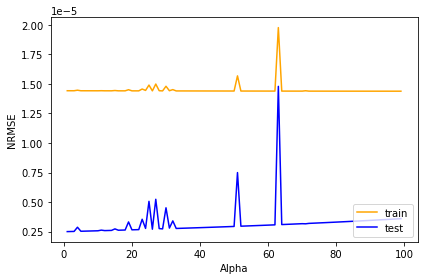

<Figure size 7200x4800 with 0 Axes>

In [38]:
plt.plot(range(1, alpha), NRMSE_train, label = 'train', c = 'orange')
plt.plot(range(1, alpha), NRMSE_test, label = 'test', c = 'b')
plt.ylabel('NRMSE')
plt.xlabel("Alpha")
plt.legend(loc='lower right')
plt.tight_layout()
plt.figure(dpi=1200)
plt.show()

In [29]:
print('NRMSE for train:', NRMSE_train[0],', NRMSE for test:', NRMSE_test[0])

NRMSE for train: 0.0002150949074402939 , NRMSE for test: 6.002302265184571e-05
